In [ ]:
!pip install SALib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.1/780.1 kB 12.6 MB/s eta 0:00:00


## **W11 G4 Global Sensitivity Analysis(GSA) methods**

# Introduction to Sensitivity Analysis (for DoE)

## What are Sensitivity and Sensitivity Analysis?
- **Sensitivity**: how much the response $y$ changes when an input (factor) $x_i$ changes.  
- **Sensitivity Analysis (SA)**: a set of methods to **quantify and rank** how inputs (and their interactions) influence a response over a chosen region of interest.

---

## Local vs Global Sensitivity — Definitions

### Local Sensitivity
- Looks **at a specific operating point** in factor space.
- For a fitted response model $\hat y(\mathbf{x})$, the local sensitivity of factor $x_i$ is the **partial derivative**
  $$
  \left.\frac{\partial \hat y}{\partial x_i}\right|_{\mathbf{x}=\mathbf{x}_0}.
  $$

### Global Sensitivity
- Assesses influence **over the whole design region**.
- In orthogonal factorial/RSM analyses, a practical global measure is the **percentage of variance** explained by each effect via ANOVA:
  $$
  \%\text{Contribution of effect}=\frac{SS_{\text{effect}}}{SS_{\text{total}}}\times 100\%.
  $$

## When to Use Which?

- **Use Local Sensitivity** when:
  -**Tuning guidance near a setpoint** (control/operations).
  - **Classifying the stationary point** from an RSM fit (min/max/saddle).
  - “If I nudge $x_i$, how does $y$ move **here**?”.

- **Use Global Sensitivity** when:
  - **Screening** and **ranking** factors from a DoE.
  - **Allocate variance** to main effects and interactions (ANOVA, Sobol’).
  - **Factors to keep, drop, or control tightly** across the **entire** region.
  - **Robust design** (what matters most over expected variability).


## Global Sensitivity Analysis - Categories and Methods

| Category | Core Principle | Representative / Existing Methods | Comments / Applications (esp. for DoE & Metamodels) |
|---|---|---|---|
| **1. Screening Methods** | Efficient, qualitative ranking of influential vs. non-influential inputs | Morris Method (Elementary Effects) | • Low computational cost, works with few samples.<br>• Often used in early stages of DoE or when building metamodels to reduce dimensionality. |
| **2. Variance-Based Methods** | Decompose total output variance into input contributions | Sobol’ indices | • Quantitative, model-independent, interpretable.<br>• Widely used with metamodels (Kriging, PCE) |
| **3. Regression- and Correlation-Based Methods** | Assess input–output influence via linear or rank correlation | SRC (Standardized Regression Coefficients) | • Fast to compute, assume near-linear/monotonic relationships.<br>• Often used in metamodel validation and screening. |
| **4. Moment-Independent / Density-Based Methods** | Measure how input changes affect output distribution  | Borgonovo $\delta$ measure | • Capture non-monotonic and non-linear effects.<br>• Useful when output variance is not a good measure of sensitivity. |
| **5. Metamodel / Surrogate-Based GSA** | Compute sensitivity indices directly from surrogate analytical forms | Polynomial Chaos Expansion (PCE)-based Sobol’ indices | • Common in DoE contexts.<br>• Can combine with variance-based or moment-independent methods. |
#### ***Global Sensitivity Analysis – Full Classification of Methods - (GSA) methods in the literature (recognized in key references like Saltelli et al., 2008; Iooss & Lemaître, 2015; Razavi & Gupta, 2016).***



# Introduction

Sensitivity analysis (SA) studies how variations in model inputs affect the model outputs.
* tells which inputs metter the most

| Type | Description | Example |
| ------------------------------------- | -------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------- |
| **Local Sensitivity Analysis**        | Examines the effect of *small perturbations* of one input around a fixed point (usually nominal values). | Change one input by ±1% and see how the output changes.         |
| **Global Sensitivity Analysis (GSA)** | Examines the effect of *input variations over their entire range* and *all combinations of inputs*.      | Vary all inputs simultaneously within their uncertainty ranges. |


#Test Function:

## Example

Extended Ishagami function with 5 inputs $x_1, x_2, x_3, x_4, x_5$:
$$
f(x) = \sin(x_1) + 7\sin^2(x_2) + 0.1x_3^4\sin(x_1) + 0.5x_4 + 0.2x_5^2
$$


**Inputs:** $x_1, x_2, x_3, x_4, x_5 \sim U(-\pi, \pi)$  

**Goal:** Identify which inputs contribute most to output variance, and detect interactions/nonlinearities.

- Compare three sensitivity analysis methods: **Sobol**, **Morris**, **Extended FAST**  

| Variable | Role                                                                                 | Expected Pattern       |
|:--------:|:--------------------------------------------------------------------------------------|:----------------------:|
| $x_1$    | Appears inside $\\sin(x_1)$ and interacts with $x_3$ → **important & nonlinear**      | Moderate–High          |
| $x_2$    | Strong squared sine → **dominant variable**                                           | Very High              |
| $x_3$    | Affects $\\sin(x_1)$ via $x_3^4$ term → **interaction variable**                      | High (interaction)     |
| $x_4$    | Linear term $0.5x_4$ → **moderate linear influence**                                  | Medium                 |
| $x_5$    | Weak quadratic term → **low influence**                                               | Low                    |



# Sobol Method

The **Sobol method** is a **variance-based global sensitivity analysis** technique that quantifies the contribution of each input variable (and their interactions) to the output variance of a mathematical model.  
It helps identify which parameters most influence the model’s behavior, making it particularly useful in uncertainty quantification and model optimization.

### Core Idea

Given a model:


$Y = f(X_1, X_2, \dots, X_k)$


where $ Y $ is the model output and $X_i $ are independent input variables, the total variance of $Y$ can be decomposed as:

$$
\mathrm{Var}(Y) = \sum_i V_i + \sum_{i<j} V_{ij} + \sum_{i<j<l} V_{ijl} + \cdots + V_{12\dots k}
$$

Each term $V_i$, $V_{ij}$, etc., represents the contribution of individual parameters and their interactions.

### Sobol Sensitivity Indices

The **first-order Sobol index** (main effect) for variable $X_i$ is defined as:

$$
S_i = \frac{V_i}{\mathrm{Var}(Y)}
$$

and the **total Sobol index**, which accounts for both direct and interaction effects, is:

$$
S_{T_i} = 1 - \frac{V_{\sim i}}{\mathrm{Var}(Y)}
$$

where $V_{\sim i}$ is the variance of $Y$ excluding $X_i$.

### Interpretation
- **First-order index $S_i$**: fraction of variance due to $X_i$ alone on $Y$
- **Total-order index $S_{T_i}$**: fraction of variance due to $X_i$, including interactions
- Values close to 0 indicate little influence; values close to 1 indicate strong influence.

**Strengths:**

- Quantitative: gives exact variance fractions.
- Captures **interactions and nonlinear effects**.

**Limitations:**

- Requires Monte Carlo sampling.
- Computationally expensive for models with many inputs or expensive evaluations.

/tmp/ipython-input-371642526.py:26: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, N, calc_second_order=True)
/usr/local/lib/python3.12/dist-packages/SALib/sample/saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (2000) is equal to `2^n`.
        
  warnings.warn(msg)


          ST   ST_conf
x1  0.510765  0.055957
x2  0.412061  0.027972
x3  0.225946  0.022746
x4  0.055213  0.003822
x5  0.023291  0.001813
          S1   S1_conf
x1  0.286476  0.043914
x2  0.416484  0.038554
x3  0.002712  0.036776
x4  0.055431  0.014234
x5  0.023419  0.008257
                S2   S2_conf
(x1, x2)  0.006756  0.066168
(x1, x3)  0.238878  0.075151
(x1, x4)  0.008925  0.051969
(x1, x5)  0.007300  0.050760
(x2, x3) -0.006814  0.050903
(x2, x4) -0.005389  0.046741
(x2, x5) -0.005589  0.047894
(x3, x4)  0.004023  0.056494
(x3, x5)  0.003456  0.056883
(x4, x5) -0.000352  0.019897


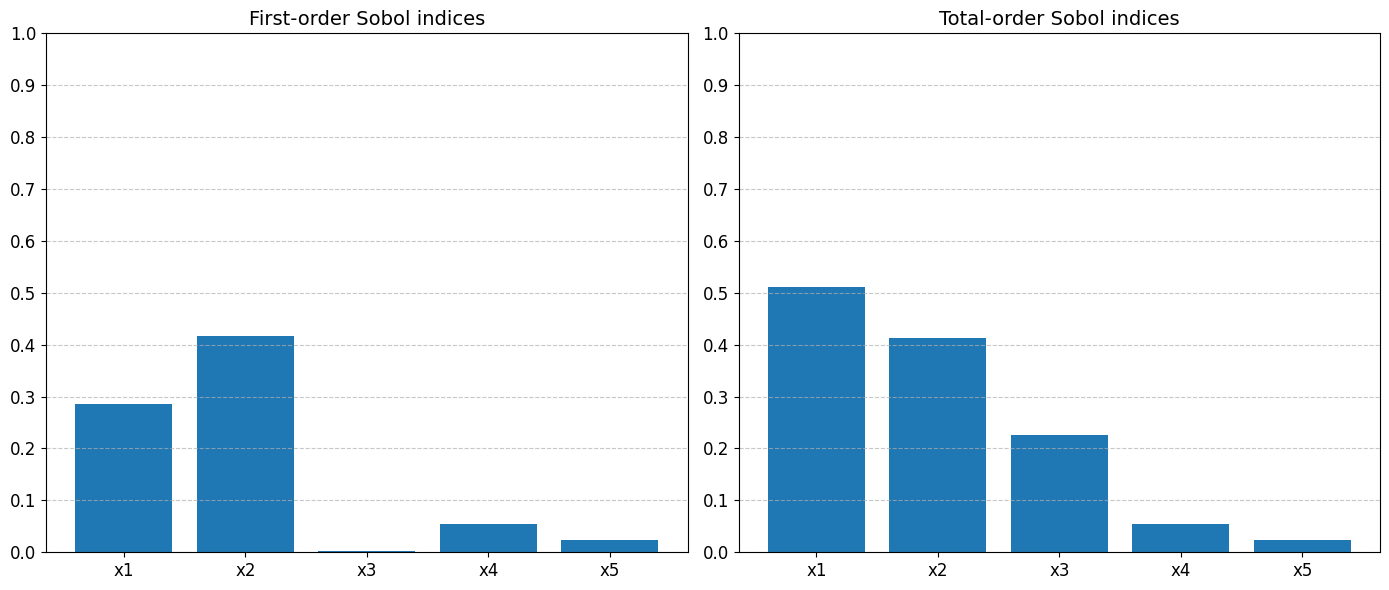

In [ ]:
# ==============================================
# Sobol Sensitivity Analysis on 5-input nonlinear function
# ==============================================

# 1. Import libraries
import numpy as np
from SALib.sample import saltelli
from SALib.analyze import sobol
import matplotlib.pyplot as plt

# 2. Define the problem (input space)
problem = {
    'num_vars': 5,
    'names': ['x1', 'x2', 'x3', 'x4', 'x5'],
    'bounds': [[-np.pi, np.pi]] * 5   # all uniform(-π, π)
}

# 3. Define the model function
def model(X):
    x1, x2, x3, x4, x5 = X.T  # unpack columns
    Y = np.sin(x1) + 7 * np.sin(x2)**2 + 0.1 * x3**4 * np.sin(x1) + 0.5 * x4 + 0.2 * x5**2
    return Y

# 4. Generate Sobol samples (Saltelli sampling)
N = 2000   # base sample size (adjust for accuracy vs. speed)
param_values = saltelli.sample(problem, N, calc_second_order=True)

# 5. Evaluate the model
Y = model(param_values)

# 6. Perform Sobol sensitivity analysis
Si = sobol.analyze(problem, Y, calc_second_order=True, print_to_console=True)

# 7. Display results (bar plot)
y_ticks = np.arange(0, 1.1, 0.1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(problem['names'], Si['S1'])
ax[0].set_title('First-order Sobol indices', fontsize=14)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].set_ylim(0, 1)
ax[0].set_yticks(y_ticks)
ax[0].grid(True, axis='y', linestyle='--', alpha=0.7)


ax[1].bar(problem['names'], Si['ST'])
ax[1].set_title('Total-order Sobol indices', fontsize=14)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].set_ylim(0, 1)
ax[1].set_yticks(y_ticks)
ax[1].grid(True, axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

# Morris Method (aka Method of Elementary Effects)

* Screening method
* When we have many uncertain inputs and want to find which one really matters before doing expansive analysis like Sobol
* Tells importance ranking, not exact variance contribution of each element

For given function
$$
y = f(x_1,x_2,\dots,x_n)
$$
we vary inputs **one at the time** along a grid of possible values, and observe how much the output changes.

## The elementary effect

For each input $x_i$ we conpute the elementary effect:
$$
EE_i = \frac{f(x_1,\dots,x_i + \Delta,\dots,x_k) - f(x_1,\dots,x_i,\dots,x_k)}{\Delta}
$$
where:
$\Delta$ is a small step $\left(\mathrm{e.g:} \ \dfrac{1}{4}, \dfrac{1}{6}, \dots \right)$

This is like finite difference derivative but computed at many random points in the input space


---

## Statistical Measures from Elementary Effects

Since each input $x_i$ will have **multiple elementary effects** (from different random trajectories), we summarize them statistically:

### 1. Mean of Absolute Effects — $\mu^*$
$$
\mu_i^* = \frac{1}{r} \sum_{j=1}^r |EE_{i,j}|
$$

- Represents the **overall influence** of input  $x_i$ on the output.
- Large $\mu^*  →  x_i $ strongly affects $y$.
- The absolute value ensures that positive and negative effects don’t cancel each other out.

### 2. Standard Deviation — $\sigma$
$$
\sigma_i = \sqrt{\frac{1}{r-1} \sum_{j=1}^r (EE_{i,j} - \bar{EE}_i)^2}
$$

- Measures **nonlinearity** and **interactions** of $x_i$ with other variables.  
- A high $\sigma_i$ means the effect of $x_i$ changes across the input space — indicating possible interactions or nonlinear responses.


          mu   mu_star         sigma  mu_star_conf
x1  7.941508  7.941508  6.247407e+00  3.550501e-01
x2 -0.047250  7.875000  7.878799e+00  1.749568e-15
x3  0.187464  6.536241  9.040678e+00  3.894894e-01
x4  3.141593  3.141593  1.213779e-14  6.888054e-16
x5  0.073693  2.631895  2.632179e+00  8.747838e-16


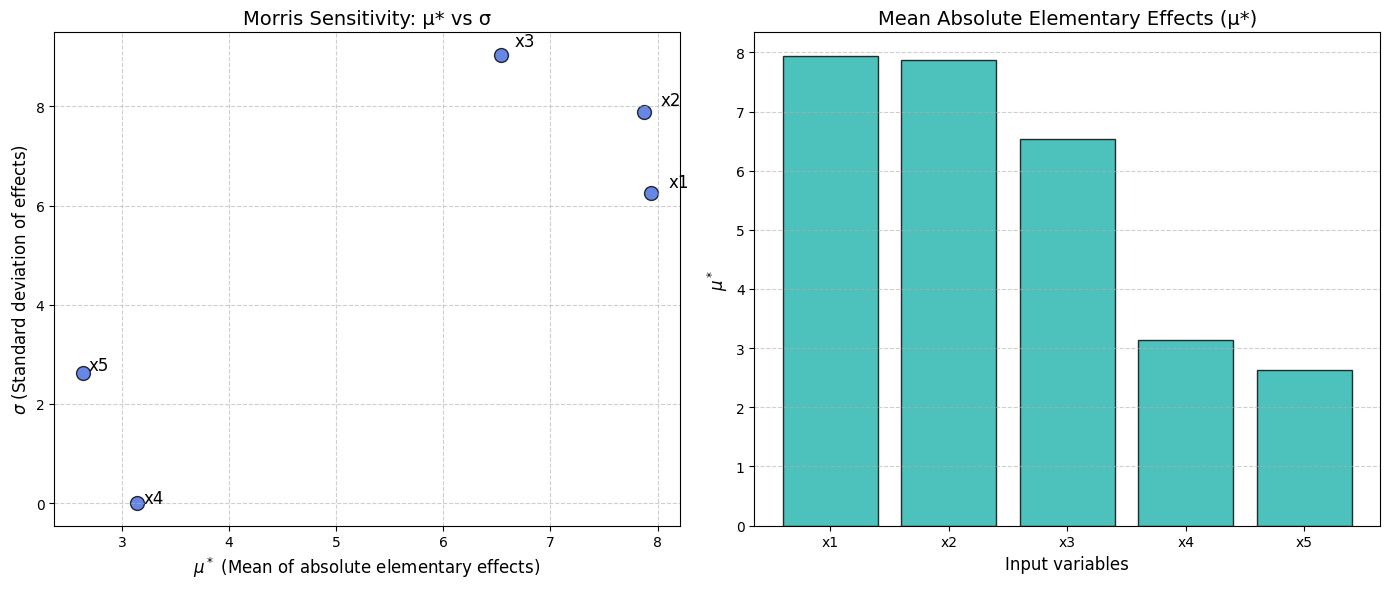

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import morris as morris_sampler
from SALib.analyze import morris as morris_analyzer

# --- 1. Define the problem
problem = {
    'num_vars': 5,
    'names': ['x1', 'x2', 'x3', 'x4', 'x5'],
    'bounds': [[-np.pi, np.pi]] * 5
}

# --- 2. Define the extended Ishigami function
def f(X):
    x1, x2, x3, x4, x5 = X.T
    return (
        np.sin(x1)
        + 7 * np.sin(x2) ** 2
        + 0.1 * x3 ** 4 * np.sin(x1)
        + 0.5 * x4
        + 0.2 * x5 ** 2
    )

# --- 3. Generate samples using Morris sampling
np.random.seed(0)
N = 1000  # number of trajectories
X = morris_sampler.sample(problem, N, num_levels=4, optimal_trajectories=None)

# --- 4. Evaluate the model
Y = f(X)

# --- 5. Perform the Morris sensitivity analysis
Si = morris_analyzer.analyze(
    problem, X, Y, conf_level=0.95, print_to_console=True, num_levels=4
)

# --- 6. Extract results
mu_star = Si['mu_star']
sigma = Si['sigma']
names = problem['names']

# --- 7. Plot results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- (a) μ* vs σ scatter plot
axes[0].scatter(mu_star, sigma, s=100, color='royalblue', edgecolor='black', alpha=0.8)
for i, name in enumerate(names):
    axes[0].text(mu_star[i]*1.02, sigma[i]*1.02, name, fontsize=12)
axes[0].set_xlabel(r'$\mu^*$ (Mean of absolute elementary effects)', fontsize=12)
axes[0].set_ylabel(r'$\sigma$ (Standard deviation of effects)', fontsize=12)
axes[0].set_title('Morris Sensitivity: μ* vs σ', fontsize=14)
axes[0].grid(True, linestyle='--', alpha=0.6)

# --- (b) Bar plot of μ*
axes[1].bar(names, mu_star, color='lightseagreen', edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Input variables', fontsize=12)
axes[1].set_ylabel(r'$\mu^*$', fontsize=12)
axes[1].set_title('Mean Absolute Elementary Effects (μ*)', fontsize=14)
axes[1].grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


| Region in Plot | Meaning |
|:---------------|:--------|
| High $\mu^{*}$, low $\sigma$ | **Important input** — mainly linear, little interaction |
| High $\mu^{*}$, high $\sigma$ | **Important input** with **nonlinear** or **interaction effects** |
| Low $\mu^{*}$, low $\sigma$ | **Unimportant input**, negligible effect |
| Low $\mu^{*}$, high $\sigma$ | Input not very important alone but **interacts** with others (rare) |

# **FAST method (Fourier Amplitude Sensitivity Test)**

[variance-based method]

Used when we have a moderate number of inputs and want to quantitatively apportion the output variance to each input, before doing even more expensive analysis like Sobol'. ***It is a QUANTITATIVE method that provides the exact first-order (main) variance contribution of each input element***.

For a given function:

$$ 𝑦 = 𝑓(𝑥₁, 𝑥₂, …, 𝑥ₙ)$$

we vary all inputs simultaneously along a specific search curve that oscillates at a unique frequency for each input, and then use a Fourier transform to decompose the output variance into the frequencies assigned to each input.

# The Main Effect Index (Sᵢ)

For each input 𝑥ᵢ, we compute the first-order sensitivity index:

$$𝑆ᵢ = 𝑉ᵢ / 𝑉$$

where:

𝑉 is the total unconditional variance of the output.
𝑉ᵢ is the partial variance of the output caused by the variation of input 𝑥ᵢ alone (the main effect).
𝑓 - model output

This is done by transforming the input space and analyzing the model output spectrum. The key idea is to assign each input a distinct frequency ωᵢ and then to see how much of the output's power spectrum is concentrated at that frequency and its harmonics.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.1/780.1 kB 13.4 MB/s eta 0:00:00
              S1        ST   S1_conf   ST_conf
x1  2.838922e-01  0.514445  0.017353  0.039954
x2  4.046047e-01  0.406586  0.015091  0.040418
x3  5.109477e-29  0.220542  0.013432  0.038373
x4  5.473405e-02  0.063872  0.016573  0.038543
x5  2.270141e-02  0.031793  0.014595  0.039594


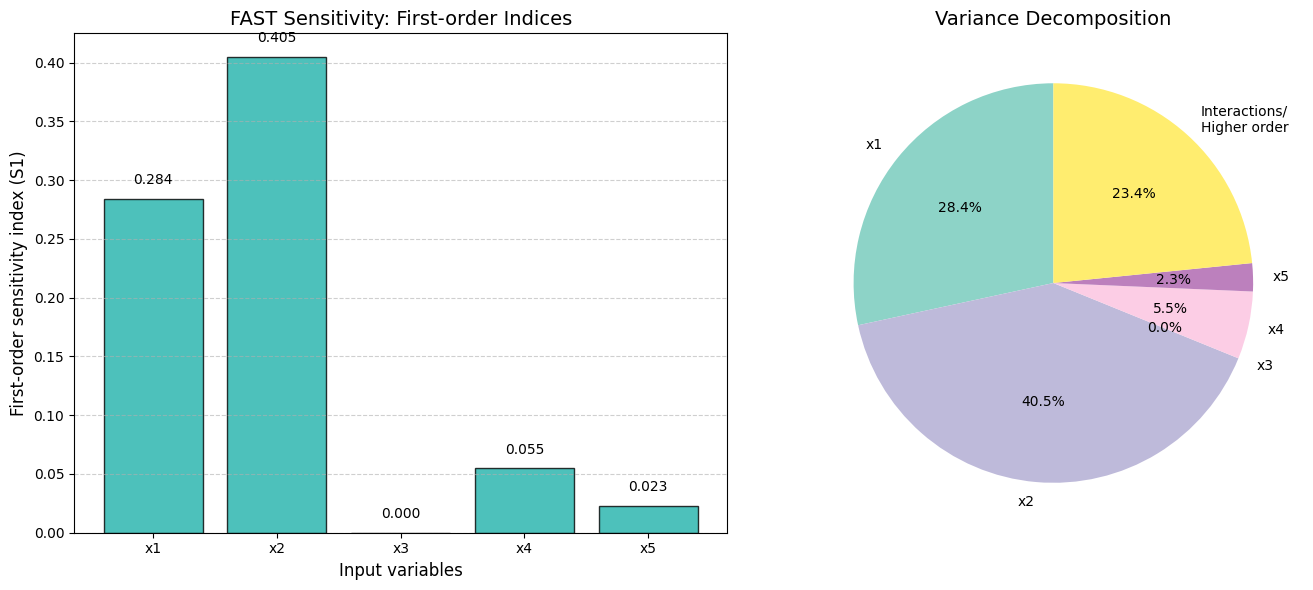


FAST SENSITIVITY ANALYSIS RESULTS
x1: S1 = 0.2839
x2: S1 = 0.4046
x3: S1 = 0.0000
x4: S1 = 0.0547
x5: S1 = 0.0227

Total variance explained by main effects: 0.7659
Variance due to interactions/higher order: 0.2341

Variable ranking by importance:
1. x2: 0.4046
2. x1: 0.2839
3. x4: 0.0547
4. x5: 0.0227
5. x3: 0.0000


In [ ]:

!pip install SALib

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import fast_sampler
from SALib.analyze import fast

# --- 1. Define the problem
problem = {
    'num_vars': 5,
    'names': ['x1', 'x2', 'x3', 'x4', 'x5'],
    'bounds': [[-np.pi, np.pi]] * 5
}

# --- 2. Define the extended Ishigami function
def f(X):
    x1, x2, x3, x4, x5 = X.T
    return (
        np.sin(x1)
        + 7 * np.sin(x2) ** 2
        + 0.1 * x3 ** 4 * np.sin(x1)
        + 0.5 * x4
        + 0.2 * x5 ** 2
    )

# --- 3. Generate samples using FAST sampling
np.random.seed(0)
N = 1000  # number of samples
X = fast_sampler.sample(problem, N, seed=0)

# --- 4. Evaluate the model
Y = f(X)

# --- 5. Perform the FAST sensitivity analysis
Si = fast.analyze(problem, Y, print_to_console=True)

# --- 6. Extract results
S1 = Si['S1']  # First-order sensitivity indices
names = problem['names']

# --- 7. Plot results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- (a) Bar plot of first-order indices (S1)
bars = axes[0].bar(names, S1, color='lightseagreen', edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Input variables', fontsize=12)
axes[0].set_ylabel('First-order sensitivity index (S1)', fontsize=12)
axes[0].set_title('FAST Sensitivity: First-order Indices', fontsize=14)
axes[0].grid(True, axis='y', linestyle='--', alpha=0.6)

# Add values on top of bars
for bar, value in zip(bars, S1):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontsize=10)

# --- (b) Pie chart showing variance contributions
# Filter out very small values for better visualization
threshold = 0.01
significant_S1 = [max(s, 0) for s in S1]  # Ensure non-negative
significant_names = names.copy()

# Calculate unexplained variance (interactions + higher order)
total_explained = sum(significant_S1)
unexplained = max(0, 1 - total_explained)

if unexplained > threshold:
    significant_S1.append(unexplained)
    significant_names.append('Interactions/\nHigher order')

# Create pie chart
colors = plt.cm.Set3(np.linspace(0, 1, len(significant_S1)))
wedges, texts, autotexts = axes[1].pie(significant_S1, labels=significant_names,
                                      autopct='%1.1f%%', colors=colors,
                                      startangle=90)
axes[1].set_title('Variance Decomposition', fontsize=14)

# Improve text appearance
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.show()

# --- 8. Print detailed results
print("\n" + "="*50)
print("FAST SENSITIVITY ANALYSIS RESULTS")
print("="*50)
for i, name in enumerate(names):
    print(f"{name}: S1 = {S1[i]:.4f}")

print(f"\nTotal variance explained by main effects: {sum(S1):.4f}")
print(f"Variance due to interactions/higher order: {1 - sum(S1):.4f}")

# --- 9. Rank variables by importance
ranking = sorted(zip(names, S1), key=lambda x: x[1], reverse=True)
print(f"\nVariable ranking by importance:")
for i, (name, value) in enumerate(ranking, 1):
    print(f"{i}. {name}: {value:.4f}")